## Урок 1. Основы обучения нейронных сетей

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [3]:
# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

In [4]:
# сигмоида
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
# сигмоида производная
def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [6]:
# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [7]:
iris_data = pd.read_csv("Iris.csv")
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


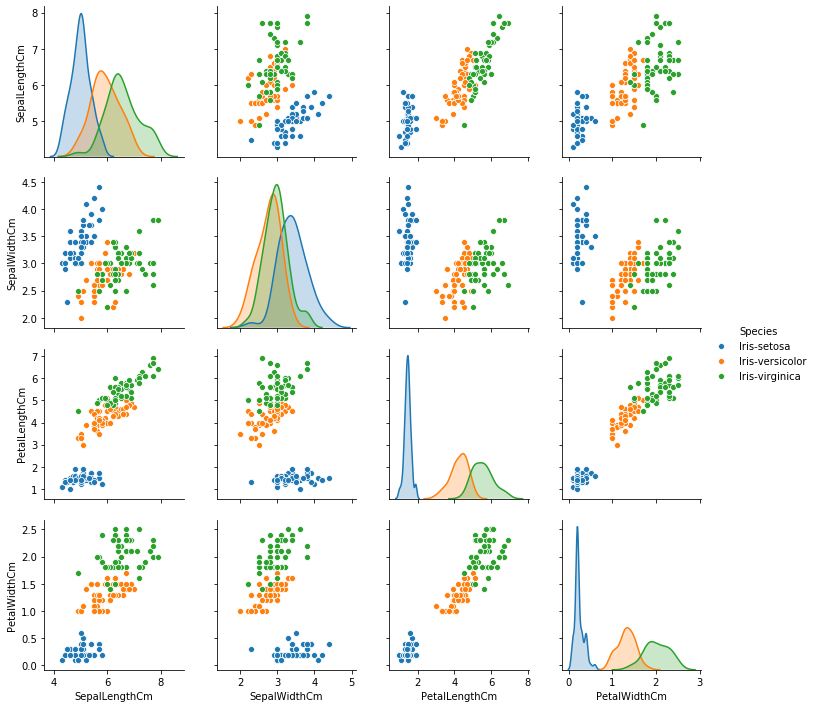

In [8]:
# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show() # расскоментируйте, чтобы посмотреть

In [9]:
# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

In [10]:
# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.as_matrix())

In [11]:
# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.as_matrix()
y = y.flatten()
y = to_one_hot(y)

In [12]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [13]:
# присваевание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

In [14]:
# скорость обучения (learning rate)
n = 0.1

In [15]:
# массив для ошибок, чтобы потом построить график
errors = []

In [16]:
# процесс обучения
for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

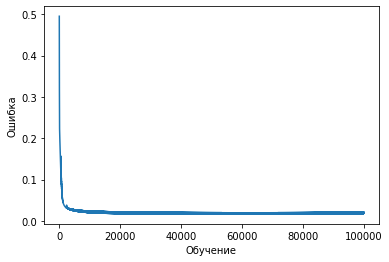

In [17]:
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

In [18]:
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Точность нейронной сети 97.82%


### Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

In [13]:
def learning (w0, w1, n, iters, X_train, y_train):
    errors = []
    # процесс обучения
    for i in range(iters):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100
    return accuracy

**Попробуем поварьировать скорость обучения (learning rate) и число итераций**

In [19]:
%%time
iters = [1000, 10000, 100000] # число итераций
n = [0.01, 0.05, 0.1, 0.5, 1, 10]
for it in iters:
    for lr in n:
        w0 = 2*np.random.random((4, 5)) 
        w1 = 2*np.random.random((5, 3))
        acc = learning(w0, w1, lr, it, X_train, y_train)
        print(f"Точность нейронной сети при скорость обучения {lr} число итераций {it} : {acc} %")
    print('--------------------------------------------------------------------')

Точность нейронной сети при скорость обучения 0.01 число итераций 1000 : 75.77690712634544 %
Точность нейронной сети при скорость обучения 0.05 число итераций 1000 : 90.62522321206474 %
Точность нейронной сети при скорость обучения 0.1 число итераций 1000 : 97.29569914697262 %
Точность нейронной сети при скорость обучения 0.5 число итераций 1000 : 77.37576420994377 %
Точность нейронной сети при скорость обучения 1 число итераций 1000 : 70.31747657234398 %
Точность нейронной сети при скорость обучения 10 число итераций 1000 : 50.0 %
--------------------------------------------------------------------
Точность нейронной сети при скорость обучения 0.01 число итераций 10000 : 95.56579888706432 %
Точность нейронной сети при скорость обучения 0.05 число итераций 10000 : 98.49435841744678 %
Точность нейронной сети при скорость обучения 0.1 число итераций 10000 : 99.02540320828838 %
Точность нейронной сети при скорость обучения 0.5 число итераций 10000 : 77.39468664887686 %
Точность нейронной 

**Видно, что очень сильно на качество влияет количество итераций - чем больше, тем лучше. Также заметно, что с увеличением скорости обучения после определенного момента точность сильно страдает. Думаю это связано с тем, что слишком быстро изменются веса на каждой итерации (проскакиваем оптимальные). И в чем-то схожа ситуация, как мне кажется, со слишком маленькой скоростью обучения - веса изменяются слишком медленно и нам просто не хватает итераций для получения оптимального результата. Для сравнения попробуем увеличить количество итераций еще на порядок:** 

In [23]:
%%time
n = 0.01
w0 = 2*np.random.random((4, 5)) 
w1 = 2*np.random.random((5, 3))
iters = 1000000 # число итераций
acc = learning(w0, w1, n, iters, X_train, y_train)
print(f"Точность нейронной сети при скорость обучения {lr} число итераций {iters} : {acc} %")

Точность нейронной сети при скорость обучения 0.5 число итераций 1000000 : 99.56774033362171 %
CPU times: user 3min 44s, sys: 60 ms, total: 3min 44s
Wall time: 3min 44s


**Видим, что результат и на наименьшей скорости обучения "подтянулся". Однако расплатой за это стало сравнимо большее время на обучение.**

**Вывод: для увеличения точности данной нейросети необходимо подобрать комбинацию из "минимальная скорость обучения - маскимальное количество итераций". "Минимальная" и "максимальное" в данном случае определяется индивидуально - с учетом приемлемой точности и допустимого времени, затраченного на обучение.**